## DATI FADN SULLE ORE TOTALI E NON PAGATE NEI SETTORI AGRICOLI

"The farm accountancy data network (FADN) monitors farms' income and business activities. It is also an important informative source for understanding the impact of the measures taken under the common agricultural policy. 

FADN is the only source of microeconomic data based on harmonised bookkeeping principles. It is based on national surveys and only covers EU agricultural holdings which, due to their size, can be considered commercial.

The methodology applied aims to provide representative data according to three categories: region, economic size and type of farming."

Leggiamo così sul portale EU riguardo i dati dell'agricoltura. 
I dati che abbiamo estratto sono quelli riguardanti esclusivamente l'Italia, suddivisi in tipologie di agricoltura, dimensione economica dell'azienda agriola, e le ore di lavoro, suddivise in totali e non retribuite.
Infatti, il seguente lavoro vuole essere un'analisi delle condizioni lavorative degli addetti all'agricoltura, guardando ai dati disaggregati per fatturato della ditta. Riteniamo infatti fondamentale capire il complesso tessuto di proteste agricole alla luce dei differenti trattamenti lavorativi.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statsmodels.api as sm


In [2]:
data = pd.read_excel('Ita labour paidunpaid.xlsx')
data.head()

,Year,Types of Farming,Economic Size (Mean),Unpaid labour input (AWU),Unpaid labour input (hrs),Total labour input (AWU),Labour input (hrs)
0,2004,Fieldcrops,16500,0.99,2233.55,1.05,2356.27
1,2004,(1) Fieldcrops,37500,1.25,2847.01,1.43,3230.62
2,2004,(1) Fieldcrops,75000,1.37,3167.89,1.80,4042.39
3,2004,(1) Fieldcrops,300000,1.61,3732.11,3.22,7082.63
4,2004,(1) Fieldcrops,500000,1.38,3231.04,12.00,24262.36


https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:European_size_unit_(ESU)

Annual work unit (AWU) is the full-time equivalent employment, i.e. the total hours worked divided by the average annual hours worked in full-time jobs in the country. One annual work unit corresponds to the work performed by one person who is occupied on an agricultural holding on a full-time basis.

European size unit, abbreviated as ESU, is a standard gross margin of EUR 1 200 that is used to express the economic size of an agricultural holding or farm.

In [3]:
data['Types of Farming'] = data['Types of Farming'].apply(lambda x: re.sub(r'\(\d\)', '', x))

In [4]:
data.head()

,Year,Types of Farming,Economic Size (Mean),Unpaid labour input (AWU),Unpaid labour input (hrs),Total labour input (AWU),Labour input (hrs)
0,2004,Fieldcrops,16500,0.99,2233.55,1.05,2356.27
1,2004,Fieldcrops,37500,1.25,2847.01,1.43,3230.62
2,2004,Fieldcrops,75000,1.37,3167.89,1.80,4042.39
3,2004,Fieldcrops,300000,1.61,3732.11,3.22,7082.63
4,2004,Fieldcrops,500000,1.38,3231.04,12.00,24262.36


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       760 non-null    int64  
 1   Types of Farming           760 non-null    object 
 2   Economic Size (Mean)       760 non-null    int64  
 3   Unpaid labour input (AWU)  739 non-null    float64
 4   Unpaid labour input (hrs)  739 non-null    float64
 5   Total labour input (AWU)   739 non-null    float64
 6   Labour input (hrs)         739 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 41.7+ KB


In [6]:
data.isnull().sum() 

Year                          0
Types of Farming              0
Economic Size (Mean)          0
Unpaid labour input (AWU)    21
Unpaid labour input (hrs)    21
Total labour input (AWU)     21
Labour input (hrs)           21
dtype: int64

In [7]:
rows_with_missing_values = data[data.isnull().any(axis=1)]
rows_with_missing_values

,Year,Types of Farming,Economic Size (Mean),Unpaid labour input (AWU),Unpaid labour input (hrs),Total labour input (AWU),Labour input (hrs)
30,2004,Granivores,16500,NaN,NaN,NaN,NaN
70,2005,Granivores,16500,NaN,NaN,NaN,NaN
110,2006,Granivores,16500,NaN,NaN,NaN,NaN
150,2007,Granivores,16500,NaN,NaN,NaN,NaN
174,2008,Wine,500000,NaN,NaN,NaN,NaN
190,2008,Granivores,16500,NaN,NaN,NaN,NaN
192,2008,Granivores,75000,NaN,NaN,NaN,NaN
230,2009,Granivores,16500,NaN,NaN,NaN,NaN
231,2009,Granivores,37500,NaN,NaN,NaN,NaN
270,2010,Granivores,16500,NaN,NaN,NaN,NaN


Dal momento che ad avere valori mancanti sono righe interamente prive di dati sui valori di nostro interesse, eliminiamo in toto le righe. 

In [8]:
data.dropna(inplace=True)

In [9]:
data.dtypes

Year                           int64
Types of Farming              object
Economic Size (Mean)           int64
Unpaid labour input (AWU)    float64
Unpaid labour input (hrs)    float64
Total labour input (AWU)     float64
Labour input (hrs)           float64
dtype: object

In [10]:
data['Year'] = data['Year'].astype(str).str[:4]  # Extract first 4 characters
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  # Convert to numeric type

In [11]:
data['Year'] = pd.to_datetime(data['Year'], format='%Y').dt.year

In [12]:
summed_data = data.groupby(['Year', 'Economic Size (Mean)'])['Unpaid labour input (AWU)', 'Total labour input (AWU)'].sum().reset_index()
summed_data

C:\Users\beatr\AppData\Local\Temp\ipykernel_7868\3483611193.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  summed_data = data.groupby(['Year', 'Economic Size (Mean)'])['Unpaid labour input (AWU)', 'Total labour input (AWU)'].sum().reset_index()


,Year,Economic Size (Mean),Unpaid labour input (AWU),Total labour input (AWU)
0,2004,16500,7.51,8.11
1,2004,37500,10.50,11.67
2,2004,75000,12.59,15.51
3,2004,300000,14.26,27.27
4,2004,500000,17.36,77.73
...,...,...,...,...
90,2022,16500,6.29,6.66
91,2022,37500,8.92,9.88
92,2022,75000,9.59,11.76
93,2022,300000,12.25,19.10


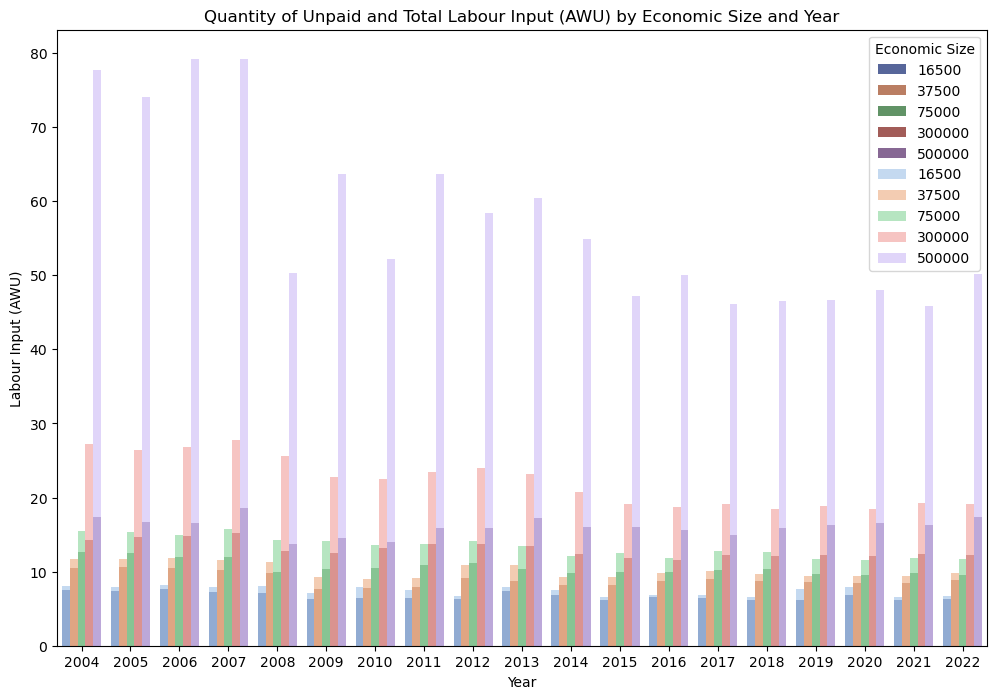

In [13]:
unpaid_palette = sns.color_palette("dark", len(summed_data['Economic Size (Mean)'].unique()))
total_palette = sns.color_palette("pastel", len(summed_data['Economic Size (Mean)'].unique()))

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the grouped bar plot with custom palettes
sns.barplot(data=summed_data, x='Year', y='Unpaid labour input (AWU)', hue='Economic Size (Mean)', palette=unpaid_palette, alpha=0.7)
sns.barplot(data=summed_data, x='Year', y='Total labour input (AWU)', hue='Economic Size (Mean)', palette=total_palette, alpha=0.7)

# Adding labels and title
plt.title('Quantity of Unpaid and Total Labour Input (AWU) by Economic Size and Year')
plt.xlabel('Year')
plt.ylabel('Labour Input (AWU)')

# Show plot
plt.legend(title='Economic Size')
plt.show()

Con la palette pastello sono indicate le work-unit, ovvero le ore totali divise per il numro medio di ore lavorative annue; mentre con la palette più scura sono indicate le work-unit non pagate. 
Ciò che si nota, al di là di un diverso impiego orario per le aziende agricole con un fatturato annuo superiore o uguale ai 500 000 €, è che il numero di ore non retribuito è rimasto costante. Inoltre, le work-unit non retribuite sono maggiori nelle aziende con un numero totale di work-unit più basso, rasentando addirittura la metà o più del totale.

In [36]:
data['Unpaid proportion'] = data['Unpaid labour input (AWU)'] / data['Total labour input (AWU)']

In [37]:
data

,Year,Types of Farming,Economic Size (Mean),Unpaid labour input (AWU),Unpaid labour input (hrs),Total labour input (AWU),Labour input (hrs),Unpaid proportion
0,2004,Fieldcrops,16500,0.99,2233.55,1.05,2356.27,0.942857
1,2004,Fieldcrops,37500,1.25,2847.01,1.43,3230.62,0.874126
2,2004,Fieldcrops,75000,1.37,3167.89,1.80,4042.39,0.761111
3,2004,Fieldcrops,300000,1.61,3732.11,3.22,7082.63,0.500000
4,2004,Fieldcrops,500000,1.38,3231.04,12.00,24262.36,0.115000
...,...,...,...,...,...,...,...,...
755,2022,Mixed,16500,0.90,2050.45,0.92,2097.27,0.978261
756,2022,Mixed,37500,1.12,2564.66,1.21,2763.89,0.925620
757,2022,Mixed,75000,1.41,3336.04,1.59,3735.94,0.886792
758,2022,Mixed,300000,1.57,3642.13,2.15,4903.56,0.730233


Come visto nel precedente grafico, possiamo stabilire una correlazione forte tra la dimensione economica delle aziende e la proporzione di ore non pagate. Dal momento che il coefficiente è negativo, si conferma che al diminuire del fatturato dell'azienza, le ore non pagate crescono.

In [16]:
correlation_matrix = data[['Economic Size (Mean)', 'Unpaid labour input (AWU)', 'Unpaid labour input (hrs)', 'Total labour input (AWU)', 'Labour input (hrs)', 'Unpaid proportion']].corr()

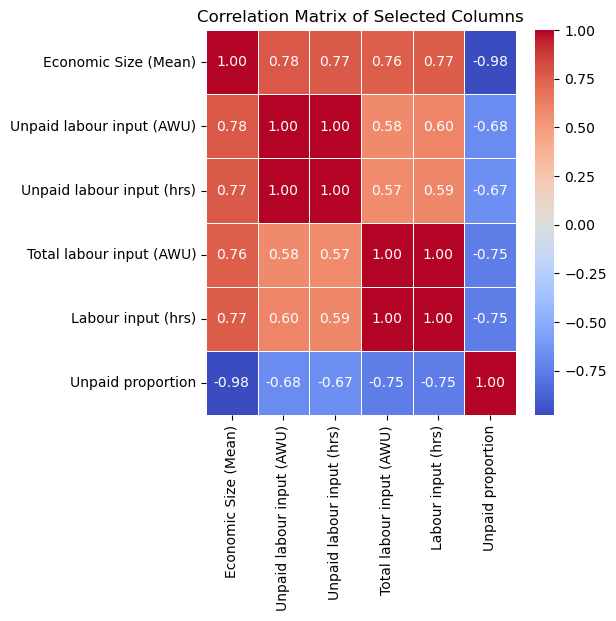

In [40]:
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Columns')
plt.show()

In [41]:
x = data['Unpaid proportion'].values.reshape(-1, 1)
y = data['Economic Size (Mean)']

In [42]:
model = LinearRegression().fit(x, y)
c0 = model.intercept_
c1 = model.coef_[0]

In [44]:
x_ext = sm.add_constant(x) 
lm= sm.OLS(y,x_ext).fit()
lm.params

const    637627.778224
x1      -627374.894468
dtype: float64

In [45]:
print(lm.summary())

                             OLS Regression Results                             
Dep. Variable:     Economic Size (Mean)   R-squared:                       0.702
Model:                              OLS   Adj. R-squared:                  0.701
Method:                   Least Squares   F-statistic:                     1733.
Date:                  Thu, 11 Apr 2024   Prob (F-statistic):          1.02e-195
Time:                          14:25:39   Log-Likelihood:                -9572.3
No. Observations:                   739   AIC:                         1.915e+04
Df Residuals:                       737   BIC:                         1.916e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.376e+05   1.14e+04

Il p value risulta molto basso, quindi possiamo scartare l'ipotesi nulla e confermare una correlazione. 

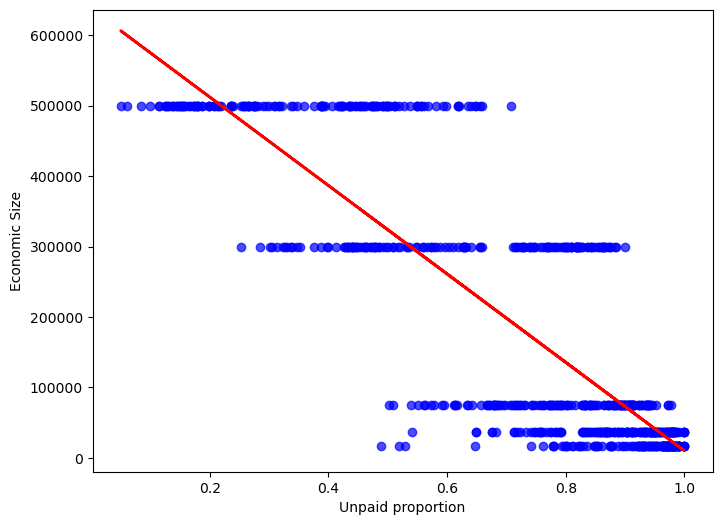

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7, label='Data')
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Unpaid proportion')
plt.ylabel('Economic Size')
plt.show()

Ovviamente, essendo "Economic Size" una variabile discreta, i punti sono organizzati per linee orizzontali, ma il rapporto di reciproca dipendenza (con segno negativo) si nota anche dallo scatter plot. 

### Conclusioni

Questa iniziale data understanding porta alla luce una problematica importante all'interno del settore agricolo: dove le aziende sono più piccole, c'è un maggior numero di ore non pagate. La preoccupazione dovuta alla possibile riduzione di terreno coltivabile, all'uso diminuito di pesticidi - che agevolano il lavoro, nonostante le gravi ripercussioni - è comprensibile alla luce della precarietà di molte persone appartenenti a questa realtà lavorativa.